# [RQ1] What’s the operation users repeat more on average within a session? 
##### Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

For this purpose, we display the monthly average and the overall average of the months of October, November, December, January, Febrary, March, April.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set()

In [3]:
#dataset used
filenames = ['2019-Oct.csv', '2019-Nov.csv','2019-Dec.csv','2020-Jan.csv','2020-Feb.csv','2020-Mar.csv','2020-Apr.csv']

In [4]:
months = ['October', 'November','December','January','Febrary','March','April']
cols = ['midnightblue', 'goldenrod','red', 'forestgreen', 'dodgerblue','rebeccapurple','orange']

In [7]:
dataframes = [pd.read_csv(file,usecols=["event_type","user_id","user_session"]) for file in filenames]

Let's look october and november data as example:

In [8]:
dataframes[0].head()

,event_type,user_id,user_session
0,view,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,view,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,view,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,view,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,view,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d


In [9]:
dataframes[1].head()

,event_type,user_id,user_session
0,view,520088904,4d3b30da-a5e4-49df-b1a8-ba5943f1dd33
1,view,530496790,8e5f4f83-366c-4f70-860e-ca7417414283
2,view,561587266,755422e7-9040-477b-9bd2-6a6e8fd97387
3,view,518085591,3bfb58cd-7892-48cc-8020-2f17e6de6e7f
4,view,558856683,313628f1-68b8-460d-84f6-cec7a8796ef2


In [10]:
def event_type_into_datasets(dataframes):
    #print for each dataset the list of event tipe
    for j in range(len(dataframes)):
        print(months[j],dataframes[j].event_type.unique())
    

Let's look what types of events there are in every dataset:

In [11]:
event_type_into_datasets(dataframes)

October ['view' 'purchase' 'cart']
November ['view' 'cart' 'purchase']
December ['view' 'purchase' 'cart']
January ['view' 'cart' 'purchase']
Febrary ['view' 'cart' 'purchase']
March ['view' 'purchase' 'cart']
April ['view' 'cart' 'purchase']


In [12]:
#counts the number of occurence of each event for each session
def count_event_types(dataframes):   
    results = [df.groupby(['user_session', 'event_type']).agg(events_count = ('event_type','count')) for df in dataframes]
    return results

Now, for each session, we see how many times each operation are performed.<br>
Below we see a piece of October as example:

In [13]:
counts = count_event_types(dataframes)
counts[0].head(5)

events_count
user_session                         event_type              
00000042-3e3f-42f9-810d-f3d264139c50 view                   2
00000056-a206-40dd-b174-a072550fa38c view                   8
00000083-8816-4d58-a9b8-f52f54186edc cart                   1
                                     purchase               1
                                     view                  16

In [14]:
#overall count
all_months = pd.concat(counts)

In [15]:
all_months_mean = all_months.groupby('event_type').agg(avg_event_type = ('events_count','mean') )

In [16]:
#caluclate the average number of occurence of each event for each session for each month 
def mean_count_event_types(dataframes):    
    counts = count_event_types(dataframes)
    mean_counts =[c.groupby('event_type').agg(avg_event_type = ('events_count','mean') ) for c in counts]
    return mean_counts

In [17]:
mean_counts = mean_count_event_types(dataframes)    

Below we see for each month the average times user perform each type of operation.

In [18]:
for m in mean_counts:
    print (m.head())

            avg_event_type
event_type                
cart              1.616679
purchase          1.179949
view              4.412088
            avg_event_type
event_type                
cart              1.737422
purchase          1.185880
view              4.616633
            avg_event_type
event_type                
cart              1.711502
purchase          1.197981
view              4.043304
            avg_event_type
event_type                
cart              1.711213
purchase          1.208526
view              3.815562
            avg_event_type
event_type                
cart              1.738196
purchase          1.591866
view              3.876134
            avg_event_type
event_type                
cart              1.811467
purchase          1.207023
view              4.150490
            avg_event_type
event_type                
cart              1.789873
purchase          1.229963
view              5.358778


In [19]:
def plot(dataframe):
    i = 0
    fig=plt.figure(figsize=(18,22))
    ax1 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax1,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)
    i = i + 1
    ax2 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax2,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)
    i = i + 1
    ax3 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax3,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)
    i = i + 1
    ax4 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax4,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)
    i = i + 1
    ax5 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax5,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)
    i = i + 1
    ax6 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax6,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)
    i = i +1 
    ax7 = fig.add_subplot(4,2,i+1)
    plot=sns.barplot(x=mean_counts[i].index,y='avg_event_type',data=mean_counts[i],ax=ax7,color=cols[i])
    plt.ylabel('Average in ' + months[i])
    plt.title('Average number of operations in ' + months[i],size = 12)

In [20]:
def plot_mean_count_event_types_all_months(all_months_mean):
    plt.figure(figsize=(9,6))
    plt.bar(x = all_months_mean.index, height= all_months_mean['avg_event_type'],color = 'crimson')        
    plt.grid( linestyle='-.', zorder = 0) 
    plt.title('Average number of times users performs each operation in a session in ' + ', '.join(months), size = 18)
    plt.xlabel('Event type',size = 14)
    plt.show()

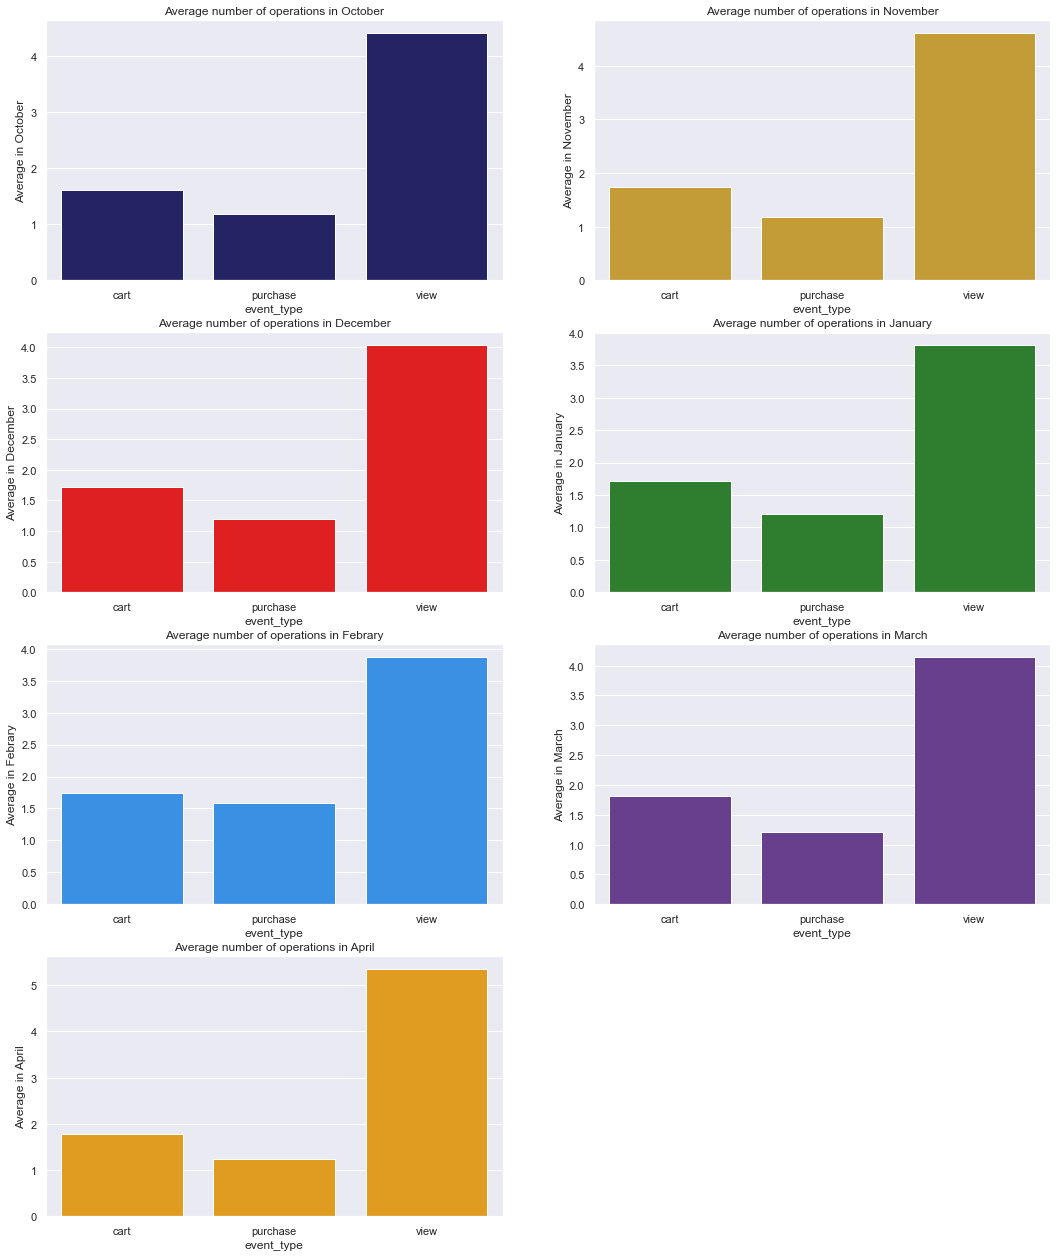

In [22]:
plot(mean_counts)

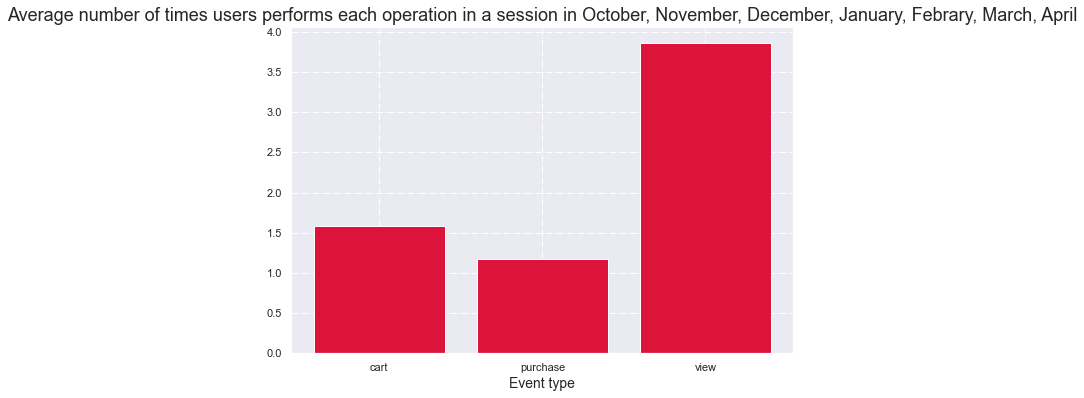

In [159]:
plot_mean_count_event_types_all_months(all_months_mean)

# [RQ 1.2] How many times, on average, a user views a product before adding it to the cart?

For each user and for each product we count how many **views** there are before a **cart**.<br>
Then, we calculate the averange.

In [7]:
datasets = [pd.read_csv(file, usecols=["event_type","user_id","product_id"])for file in filenames]

First of all, we only look at the views and cart event:

In [8]:
def only_view_and_cart(datasets):
    new_ds = [d[d.event_type.isin(['view','cart'])] for d in datasets]
    return new_ds

In [9]:
datasets = only_view_and_cart(datasets)

We only take the user-product pairs whose user actually adds the product to the cart after seeing it.

In [10]:
#take only the user-product pairs where product are added to the cart by the user
def only_cart_user_prod(datasets):
    new_sets = []
    for d in datasets:
        cart = d[d.event_type=='cart'].drop_duplicates()
        cart = cart.drop('event_type',axis=1)
        new_d = pd.merge(d,cart,how='left', on = ["user_id","product_id"])
        new_sets.append(new_d)
    return new_sets

In [11]:
datasets = only_cart_user_prod(datasets)
datasets[0].head()

,event_type,product_id,user_id
0,view,44600062,541312140
1,view,3900821,554748717
2,view,17200506,519107250
3,view,1307067,550050854
4,view,1004237,535871217


In [12]:
#compute how many view there are before a cart for each product for each user
def views_before_cart(datasets):
    views_before_cart_datasets = []
    for ds in datasets:
        views_before_cart_datasets.append(ds.groupby(['user_id','product_id','event_type'],sort=False)\
        .agg(views_before_cart=('event_type','count'))\
        .groupby(['user_id','product_id']).nth(0) )
    return views_before_cart_datasets                                 
    

In [13]:
views_before_cart = views_before_cart(datasets)

Then, we calculate for each user and for each product he added to cart, how many views the user has made before adding it to the cart.<br>
let's see what happened for the month of November:

In [167]:
views_before_cart[1].head(10)

views_before_cart
user_id   product_id                   
422073359 31501013                    1
436701163 1004856                     1
442818338 1004856                     1
450284033 1004766                     1
454621403 1004249                     2
464783634 10301494                    1
482114459 3900003                     3
          3900815                     2
          3900934                     1
482871459 12710875                    1

In [14]:
def avg_views_before_cart(views_before_cart_datasets):
    for d in views_before_cart_datasets:
        views = [d.reset_index().drop(columns=['user_id','product_id'])]
    tot_views = pd.concat(views)
    return round(tot_views.mean(),2)

In the end, we consider all the months and we calculate the average number of views:

In [16]:
avg_views_before_cart(views_before_cart)[0]

1.76

# [RQ 1.3] What’s the probability that products added once to the cart are effectively bought?

We want to know the ratio between the number of times products has been bought on the number of times it has been added to the cart.<br>


In [170]:
frames = [pd.read_csv(file,usecols=["event_type","product_id"],index_col='event_type') for file in filenames]

In [171]:
frames = [f[f.index.isin(['purchase','cart'])] for f in frames] 

We see the products for October dataset as example:

In [172]:
frames[0]

,product_id
event_type,
purchase,1004856
purchase,1002532
cart,5100816
purchase,5100816
purchase,13800054
...,...
purchase,47500017
purchase,1003306
cart,1004240


In [173]:
def only_cart_product(frames):
    new_frames = []
    for f in frames:
        cart_products = f[f.index=='cart']['product_id'] #products that have been added to cart 
        f[f.product_id.isin(cart_products)]
        new_frames.append(f)
    return new_frames

For answer, we first get all and only the products that have been added to the cart.

Then we count how many times they are been added to cart and how many times they are been bought.

Finally, we see the ratio between them.

In [174]:
frames = only_cart_product(frames)

In [175]:
all_months = pd.concat(frames)

In [176]:
(all_months.index == 'purchase').sum() / (all_months.index == 'cart').sum()

0.3583133528439244

# [RQ 1.4] What’s the average time an item stays in the cart before being removed?

We measure, for each product, the time it stays in a cart (of a specific user).<br>
For do this, we calculate the time interval between when a product is added to the cart and when it is bought.<br>
Then, we calculate the average time over all the products.

First, we select only the columns: 
- user_id
- event_time
- product_id
- event_type

and the events:
1. cart
2. purchase

In [5]:
dfs = [pd.read_csv(f, usecols=['user_id','event_time','product_id','event_type']) for f in filenames]

In [18]:
def only_cart_purchase(dfs):
    only_cart_purch_dfs = [ df[df.event_type.isin(['cart','purchase'])] for df in dfs]
    return only_cart_purch_dfs

In [19]:
cart_purchase_dfs = only_cart_purchase(dfs)

In [20]:
def time_btw_purchase_cart(framelist):
    delta = []
    for df in framelist:
        for key, frame in df.groupby(['user_id','product_id']):
            for i in range(1, len(frame),2):        
                if ((frame['event_type'].iloc[i] == 'purchase') and (frame['event_type'].iloc[i-1] == 'cart')):
                    delta.append(pd.to_datetime(frame['event_time'].iloc[i])  - pd.to_datetime(frame['event_time'].iloc[i-1]))
    return delta
    

In [21]:
time_delta = time_btw_purchase_cart(cart_purchase_dfs)

In [22]:
mean_time = sum(time_delta, timedelta()) / len(time_delta)

In [23]:
mean_time

Timedelta('0 days 00:14:17.659231')

In [24]:
minutes = mean_time.seconds//60
seconds = mean_time.seconds - minutes*60
print("%02d:%02d" % (minutes,seconds),'minutes')

14:17 minutes


# [RQ1.5] How much time passes on average between the first view time and a purchase/addition to cart?

To answer we find for each user for each product:<br>
the time in which the user saw a specific product for the first time and the time in which he bought it.<br>
The we calculate the difference between this two time.<br>
Finally, we calculate the average over all time intervals.

In [6]:
df = dfs[0]
df.head()

,event_time,event_type,product_id,user_id
0,2019-10-01 00:00:00 UTC,view,44600062,541312140
1,2019-10-01 00:00:00 UTC,view,3900821,554748717
2,2019-10-01 00:00:01 UTC,view,17200506,519107250
3,2019-10-01 00:00:01 UTC,view,1307067,550050854
4,2019-10-01 00:00:04 UTC,view,1004237,535871217


To do this, first we group our data based on the user, the product and the type of event,<br>
where for each user and product, the first group collects the views, the second group collects the other types of events (cart or purchase).<br>
Since we are interested in the average measure of user behavior, for each pair user-product, we only look at the first time the user view the product and the relative first time he bought it (or added to cart), ignoring the events in which a user re-acquires the same product.<br>
Let's have a look below for the user 555480250 as example, we see that some products were simply displayed while the product 3700777 was viewed and added to the cart, so we calculate the difference between these two events.

In [88]:
df[df.user_id==555480250].groupby(['user_id','product_id','event_type'],sort=False).first()


event_time
user_id   product_id event_type                         
555480250 3700778    view        2019-10-01 04:13:04 UTC
          3700787    view        2019-10-01 04:14:35 UTC
          3700829    view        2019-10-01 04:17:23 UTC
          3700777    view        2019-10-01 04:28:18 UTC
                     cart        2019-10-01 04:28:27 UTC

Then we locate the cart event (or purchase event) and we associate with its view:

In [91]:
view = df[df.user_id==555480250].groupby(['user_id','product_id','event_type'],sort=False).first()\
.groupby(['user_id','product_id'],sort=False).nth(0)
cart = df[df.user_id==555480250].groupby(['user_id','product_id','event_type'],sort=False).first()\
.groupby(['user_id','product_id'],sort=False).nth(1)
view_and_cart = pd.merge(cart, view, how='left',on= ['user_id','product_id'])
view_and_cart

,,event_time_x,event_time_y
user_id,product_id,,
555480250,3700777,2019-10-01 04:28:27 UTC,2019-10-01 04:28:18 UTC


**event_time_x** is the time when the user add to cart the product.<br>
**event_time_y** is the time when the user view to cart the product.

Finally, we compute the difference between the two event time.

In [92]:
view_and_cart['delta time'] = pd.to_datetime(view_and_cart['event_time_x']) - pd.to_datetime(view_and_cart['event_time_y'])
view_and_cart

,,event_time_x,event_time_y,delta time
user_id,product_id,,,
555480250,3700777,2019-10-01 04:28:27 UTC,2019-10-01 04:28:18 UTC,00:00:09


Now let's do that for the entire dataset:

In [6]:
first_events_list = [df.groupby(['user_id','product_id','event_type'],sort=False).first() for df in dfs]

In [7]:
first_view_list = [fe.groupby(['user_id','product_id'],sort=False).nth(0) for fe in first_events_list]

In [8]:
first_cart_list = [fc.groupby(['user_id','product_id'],sort=False).nth(1) for fc in first_events_list]

In [9]:
time_btw_view_and_cart_list =[ pd.merge(cart, view, how='left',on= ['user_id','product_id']) 
                             for cart,view in zip(first_cart_list,first_view_list)]

In [10]:
def add_deltatime_column(dataframe_list):
    dataframe_result_list = []
    for frame in dataframe_list:
        frame['delta time'] = pd.to_datetime(frame['event_time_x']) - pd.to_datetime(frame['event_time_y'])
        dataframe_result_list.append(frame)
    return dataframe_result_list

In [11]:
deltatime_dataframes = add_deltatime_column(time_btw_view_and_cart_list)

Below we see for example the data for October.<br>
For each user and for each product (purchased by the user) we collect the instant in which the user saw the product for the first time and the time in which he added it to the cart or bought it.<br>
- **event_time_x** is the time of purchase (or add to cart).
- **event_time_y** is the time of view. 
- **delta time** is the difference between them.

In [14]:
deltatime_dataframes[0].head()

,,event_time_x,event_time_y,delta time
user_id,product_id,,,
543272936,1004856,2019-10-01 00:02:14 UTC,2019-10-01 00:01:46 UTC,00:00:28
551377651,1002532,2019-10-01 00:04:37 UTC,2019-10-01 00:02:47 UTC,00:01:50
550121407,5100816,2019-10-01 00:05:14 UTC,2019-10-01 00:04:47 UTC,00:00:27
514591159,5100816,2019-10-01 00:06:02 UTC,2019-10-01 00:04:02 UTC,00:02:00
555332717,13800054,2019-10-01 00:07:07 UTC,2019-10-01 00:06:00 UTC,00:01:07


In [12]:
def calculate_mean_deltatime(dataframe_list):
    all_months_frame = pd.concat(dataframe_list)
    return all_months_frame['delta time'].mean()

Now, we calculate the mean value of all the **delta time** values:

In [13]:
calculate_mean_deltatime(deltatime_dataframes)

Timedelta('0 days 20:48:00.105892')

We see a value of 20 hours and 48 minutes.

It may seem a quite high value, but let's take a look at October and its largest **delta time** value. 

In [24]:
deltatime_dataframes[0].nlargest(1,'delta time')

,,event_time_x,event_time_y,delta time
user_id,product_id,,,
552651881,1004250,2019-10-31 21:03:01 UTC,2019-10-01 06:32:54 UTC,30 days 14:30:07


Now we check the **user** and **product** found in the original dataframe and see how actually 30 days have passed between the first time the user saw the product and the first action (between cart or purchase).

In [17]:
oct_frame = dfs[0]

In [23]:
oct_frame[(oct_frame['user_id']==552651881) & (oct_frame['product_id']== 1004250)]

,event_time,event_type,product_id,user_id
228902,2019-10-01 06:32:54 UTC,view,1004250,552651881
229056,2019-10-01 06:33:04 UTC,view,1004250,552651881
42421059,2019-10-31 21:02:54 UTC,view,1004250,552651881
42421095,2019-10-31 21:03:01 UTC,cart,1004250,552651881
42421261,2019-10-31 21:03:33 UTC,purchase,1004250,552651881
42421813,2019-10-31 21:05:24 UTC,view,1004250,552651881
42421953,2019-10-31 21:05:58 UTC,view,1004250,552651881


------------------------------------------------------

-------------------------------------------------------

# [RQ3] For each category, what’s the brand whose prices are higher on average? 

#### Write a function that asks the user a category in input and returns a plot indicating the average price of the products sold by the brand.

For this answer we consider as **category** the name before the . in the category code. 

So, first of all we clean up our data, dropping all the _na_ in the **category_code** and **brand** columns.

Then, we select only the sold products.

Finally we wrote a function that accepts as input the name of a **category** such as _accessories, electronics, furniture_ and plots the average price of the most expensive brands, i.e. the brands with the highest average price of the products sold in the year, sorted by the average price.

Below, as example, we see the average prices of brands belonging to the category *electronics*.

In [170]:
dataframes = [pd.read_csv(file,usecols=['category_code','brand','price','event_type'], nrows=100000) for file in filenames]

In [171]:
salesframes = [df[df.event_type=='purchase'][['category_code','brand','price']].dropna() for df in dataframes]

In [172]:
saleframes = [df.assign(category=(df['category_code'].apply(lambda x: x.split('.')[0])))[['category','brand','price']] for df in salesframes]

In [173]:
all_months_frame = pd.concat(saleframes)       

Below we see the original dataset structure, with the **category_code** esxpressed as *category.subcategory*:

In [174]:
salesframes[0].head()

,category_code,brand,price
162,electronics.smartphone,samsung,130.76
308,electronics.smartphone,apple,642.69
442,furniture.bathroom.toilet,santeri,54.42
574,electronics.audio.headphone,apple,189.91
603,electronics.audio.headphone,apple,161.98


We extract the **category** from the category code:

In [175]:
all_months_frame.head()

,category,brand,price
162,electronics,samsung,130.76
308,electronics,apple,642.69
442,furniture,santeri,54.42
574,electronics,apple,189.91
603,electronics,apple,161.98


In [176]:
def plot_brand_highest_price(category, data):
    fig=plt.figure(figsize=(21,9))
    plot=sns.barplot(x='brand',y='price',data= data.nlargest(20,'price'))
    for p in plot.patches:
        plot.annotate(format(p.get_height(), ',.0f'),
                      (p.get_x()+p.get_width() /2.,p.get_height() ),
                      ha = 'center',
                      va = 'center', 
                      xytext = (0, 12), 
                      textcoords = 'offset points')
    plt.title('Average price for each brand of the category ' + category, size=18)
    plt.xlabel('Brands',size=12)
    plt.ylabel('Average price  [$]',size=12)

In [177]:
def brand_highest_price():
    category_target = input('insert a category:')
    target_frame = all_months_frame[all_months_frame.category == category_target]
    if target_frame.empty:
        print(category_target, 'not found')
        return
    g = target_frame.groupby('brand').agg({'price':'mean'}).reset_index()
    plot_brand_highest_price(category_target, g)

insert a category:electronics


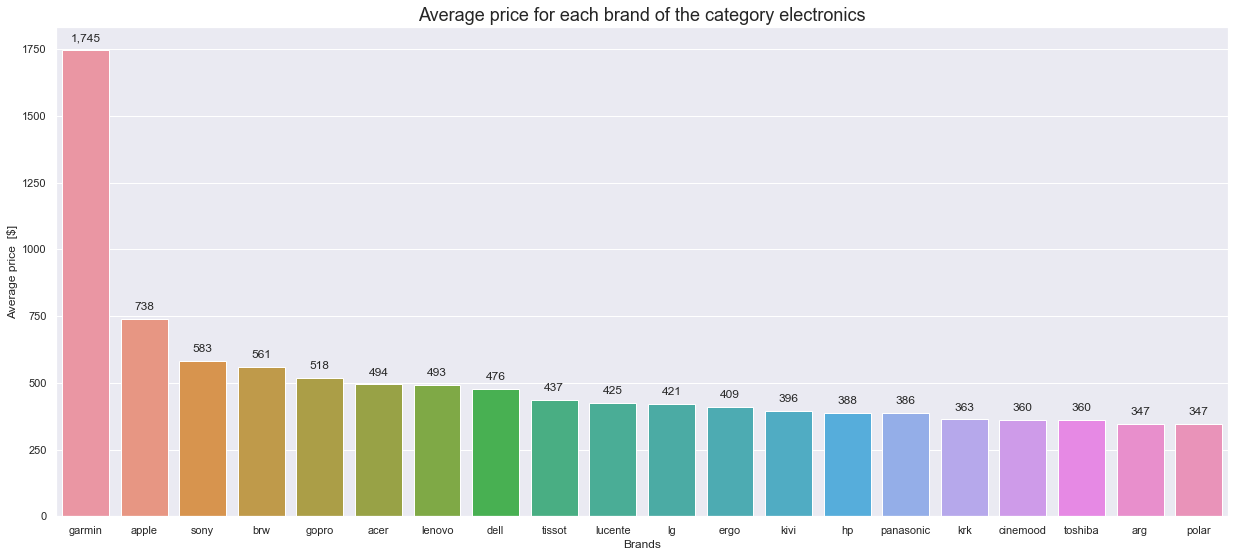

In [178]:
brand_highest_price()

## Find, for each category, the brand with the highest average price. Return all the results in ascending order by price

In [179]:
all_months_frame.groupby(['category', 'brand']).agg({'price':'mean'})['price']\
.groupby('category', group_keys=False)\
.apply(lambda x: x.sort_values(ascending=False).head(1)).reset_index().sort_values(by='price', ascending=False)

,category,brand,price
8,furniture,sony,2265.150
7,electronics,garmin,1745.220
2,appliances,krk,1603.130
4,computers,apple,1352.420
11,sport,sportop,1171.200
5,construction,dji,910.960
1,apparel,ostamebel,765.785
3,auto,alkor,690.630
0,accessories,brw,592.290
9,kids,marshall,438.360


---------------------------------------------------

# [RQ4] How much does each brand earn per month? 

### Write a function that given the name of a brand in input returns, for each month, its profit. 

To find out the profits of each brand, first of all, we select only the purchases in the datasets for each month.

Then, we define a function that, given the name of a brand, calculates its profits in each monthly dateset. 

For example, we call the fuction with the brand _Samsung._

In [26]:
periods = {0:'October - November',1:'November - December',2:'December - January',3:'January - Febrary',
           4:'Febrary - March',5:'March - April'}

In [5]:
dataframes = [pd.read_csv(file,usecols=['brand', 'price','event_type']) for file in filenames]

In [6]:
dataframes = [df.dropna() for df in dataframes]

In [7]:
purchase_dataframe = [df[df.event_type == 'purchase'][['brand', 'price']] for df in dataframes]

In [8]:
def profit_per_month(brand_target,dataframes):
    profits = [df[df.brand==brand_target].price.sum() for df in dataframes]
    return profits        

In [9]:
def brand_profit_per_month(brand_target,dataframes):
    profits = profit_per_month(brand_target,purchase_dataframe)
    print('The profits for the brand: "'+ brand_target +'" was:')
    print(f"{'Month' : <12}{'Profit $' : <12}")
    for i in range(len(profits)):
        print(f"{months[i] : <12}{round(profits[i],2) : <12}") 

In [10]:
brand_profit_per_month('samsung',purchase_dataframe)

The profits for the brand: "samsung" was:
Month       Profit $    
October     46407532.61 
November    54869880.87 
December    71858811.05 
January     55786627.06 
Febrary     74269250.38 
March       65440260.34 
April       56791598.49 


## Find the top 3 brands that have suffered the biggest losses in earnings between one month and the next

For this purpose we find the profits of each brand in each month.

In the event that a brand is not present in a montly dataset we assume a profit equal to 0 in that month.

In particular, for each brand we find out its biggest losses between one month and the next and the relatives months.

In the end, we select the 3 biggest losses.

In [11]:
all_brands_frames = pd.concat([df['brand'] for df in purchase_dataframe]).drop_duplicates().to_frame()

In [12]:
all_brands_frames.head()

,brand
162,samsung
308,apple
379,xiaomi
442,santeri
672,oasis


In [16]:
def max_loss(brand_name,purchase_dataframe):
    brand_name = brand_name['brand']
    profits = profit_per_month(brand_name,purchase_dataframe)
    loss = []
    for i in range((len(profits) - 1)):   
        if (profits[i] == 0):
            loss.append(round(((profits[i + 1] - profits[i]))*100,2))
        else:
            loss.append(round(((profits[i + 1] - profits[i])/profits[i])*100,2))
    return [min(loss),loss.index(min(loss))]    

In [17]:
all_brands_frames[['max_loss','period']] = all_brands_frames.apply(lambda x: max_loss(x,purchase_dataframe),axis=1, result_type='expand')

Below we see for a portion of the brand set the largest loss of earnings (**max_loss**) compared to the previous month as a percentage, 

 with the period to which it refers, where period 0 means November-October,period 1 Dicember-November and so on until 
 
 period 5 that means April-March.

In [19]:
all_brands_frames.head()

,brand,max_loss,period
162,samsung,-22.37,2.0
308,apple,-47.43,5.0
379,xiaomi,-29.05,4.0
442,santeri,-63.42,5.0
672,oasis,-57.84,2.0


In [27]:
three_big_loss = all_brands_frames.nsmallest(3,'max_loss')
three_big_loss['period'] = three_big_loss['period'].apply(lambda x : periods[x])

Finaly we see the 3 biggest losses and the relative periods:

In [28]:
three_big_loss

,brand,max_loss,period
2885,ersport,-100.0,March - April
16339,sly,-100.0,October - November
27078,ea,-100.0,December - January


So *ersport*, *sly* and *ea* suffered a 100% loss of earnings respectively between March and April,October and November,December and January. This means that in the second months it did not gain anything.

-----------------------------------------------------

# [RQ5] In what part of the day is your store most visited?

### We want to know which day of the week there are more visitors. 

For this question we will find the average number of visitors per hour for each day of the week.

For "visitor" we look at the **user_id**, beacause in each dataset each visitor is identified by a unique user_id.

We used this to get the number unique visitors in each day. 

Finally, starting from the absolute number of visitors per day we calculate the hourly average.

In [3]:
# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

In [4]:
#dataset used
filenames = ['2019-Oct.csv', '2019-Nov.csv','2019-Dec.csv','2020-Jan.csv','2020-Feb.csv','2020-Mar.csv','2020-Apr.csv']

In [10]:
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

In [5]:
dataframes = [pd.read_csv(file,usecols=['event_time', 'user_id'],parse_dates=['event_time'],date_parser=pd.to_datetime) for file in filenames]

In [21]:
week_frame = [df.groupby([df.event_time.dt.weekday]).user_id.nunique().reset_index(name='visitors') for df in dataframes]

First, we find the absolute number of vistors in each day of the week, for each montly dataframe.

Below we see October as example:

In [18]:
october = week_frame[0]
october['event_time'] = october['event_time'].apply(lambda x : day[x])
october

,event_time,visitors
0,Monday,707787
1,Tuesday,889037
2,Wednesday,878913
3,Thursday,836989
4,Friday,762843
5,Saturday,713040
6,Sunday,737350


In [22]:
year_frame = sum(week_frame)

Then we sum all the months:

In [24]:
year_frame['event_time'] = year_frame['event_time'].apply(lambda x : day[x/7])
year_frame

,event_time,visitors
0,Monday,7439731
1,Tuesday,7490929
2,Wednesday,7527666
3,Thursday,7411765
4,Friday,7224134
5,Saturday,7191362
6,Sunday,7358128


In [25]:
year_frame['visitors'] = round(year_frame['visitors']/24)

In [29]:
year_frame.columns = ['day of week', 'hourly average visitors']

In the end, we compute the hourly average number of visitors:

In [30]:
year_frame

,day of week,hourly average visitors
0,Monday,309989.0
1,Tuesday,312122.0
2,Wednesday,313653.0
3,Thursday,308824.0
4,Friday,301006.0
5,Saturday,299640.0
6,Sunday,306589.0


In [52]:
def plot(frame):
    f = plt.figure()
    plt.xticks(range(0,7),frame['day of week'])
    plt.ylabel("hourly average")
    plt.xlabel("day of week")
    plt.title("Hourly average of visitors in each day of the week")
    plt.plot(range(0,7), frame['hourly average visitors'], '-o', markersize=10, color='crimson')
    plt.grid(color ='lightgray', linestyle = '-.')
    f.set_figwidth(14)
    f.set_figheight(5)

We see how the number of e-commerce visitors decreases over the weekend and in maximum in the in the first days of the week:

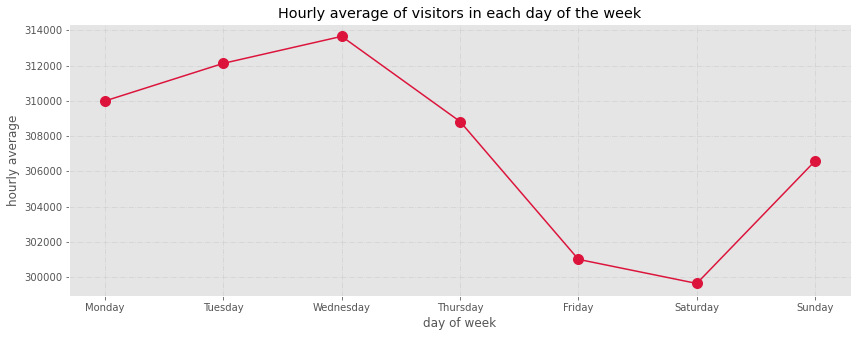

In [53]:
plot(year_frame)

----------------------------------------------